# Experiment 1 : Grow of stables attractors fields in Aleatory CBN

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Load the dataset
df = pd.read_csv("outputs/exp1_data_3_10_10/data.csv")
df.head(100)

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_edges,step,method,execution_time,n_local_attractors,n_pair_attractors,n_attractor_fields
0,1,3,5,2,2,2,3,1,1,0.225050,16.0,NaN,NaN
1,1,3,5,2,2,2,3,1,2,0.165812,16.0,NaN,NaN
2,1,3,5,2,2,2,3,1,3,0.163065,16.0,NaN,NaN
3,1,3,5,2,2,2,3,2,1,0.000071,NaN,0.0,NaN
4,1,3,5,2,2,2,3,2,2,0.040331,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,5,5,2,2,2,5,2,3,0.047600,NaN,0.0,NaN
96,2,5,5,2,2,2,5,3,1,0.000051,NaN,NaN,0.0
97,2,5,5,2,2,2,5,3,2,0.032725,NaN,NaN,0.0
98,2,5,5,2,2,2,5,3,3,0.000089,NaN,NaN,0.0


In [33]:
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges', 'step', 'method',
       'execution_time', 'n_local_attractors', 'n_pair_attractors',
       'n_attractor_fields'],
      dtype='object')

In [34]:
print(df[df['execution_time'] == 0.0])
print(df[df['execution_time'].isnull()])

Empty DataFrame
Columns: [i_sample, n_local_networks, n_var_network, v_topology, n_output_variables, n_clauses_function, n_edges, step, method, execution_time, n_local_attractors, n_pair_attractors, n_attractor_fields]
Index: []
Empty DataFrame
Columns: [i_sample, n_local_networks, n_var_network, v_topology, n_output_variables, n_clauses_function, n_edges, step, method, execution_time, n_local_attractors, n_pair_attractors, n_attractor_fields]
Index: []


## General Statistics

### Statistics

In [44]:
# Estadísticas generales
stats_exec_time = df.groupby(["step", "method"])["execution_time"].describe()
stats_attractors = df[["n_local_attractors", "n_pair_attractors", "n_attractor_fields"]].describe()

stats_exec_time

count      mean       std       min       25%       50%  \
step method                                                            
1    1        80.0  0.652919  1.826228  0.088079  0.241650  0.371842   
     2        80.0  0.216717  0.394676  0.073742  0.140298  0.167208   
     3        80.0  0.201902  0.292763  0.068748  0.142527  0.164943   
2    1        80.0  0.000102  0.000038  0.000056  0.000076  0.000094   
     2        80.0  0.051292  0.017488  0.036923  0.044675  0.047760   
     3        80.0  0.048732  0.013923  0.036599  0.042202  0.046642   
3    1        80.0  0.000053  0.000010  0.000042  0.000046  0.000048   
     2        80.0  0.044075  0.013587  0.032699  0.037267  0.040332   
     3        80.0  0.000114  0.000159  0.000078  0.000087  0.000090   

                  75%        max  
step method                       
1    1       0.530392  16.073739  
     2       0.194765   3.666442  
     3       0.193587   2.742321  
2    1       0.000119   0.000240  
     2       0.052042   0.175131  
     3       0.050559   0.131947  
3    1       0.000055   0.000086  
     2       0.046561   0.126441  
     3       0.000103   0.001513

In [45]:
stats_attractors

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,240.000000,240.0,240.0
mean,28.087500,0.0,0.0
std,18.925439,0.0,0.0
min,6.000000,0.0,0.0
25%,15.000000,0.0,0.0
50%,22.500000,0.0,0.0
75%,34.500000,0.0,0.0
max,102.000000,0.0,0.0


### Histograms

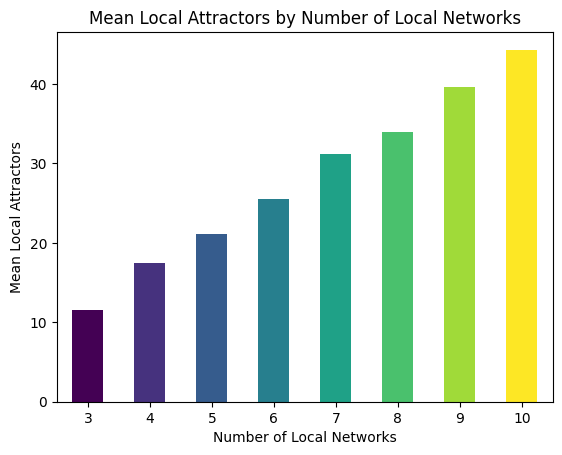

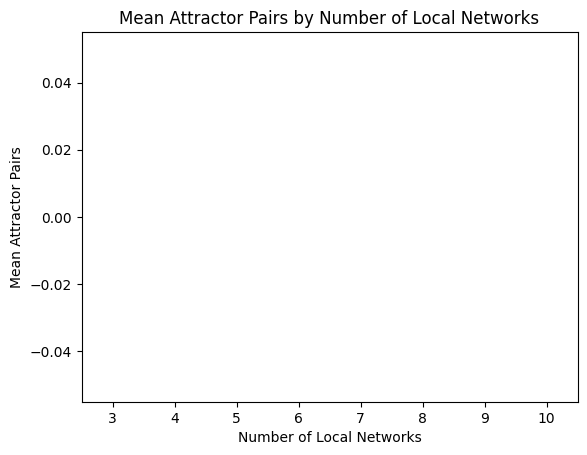

/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:822: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


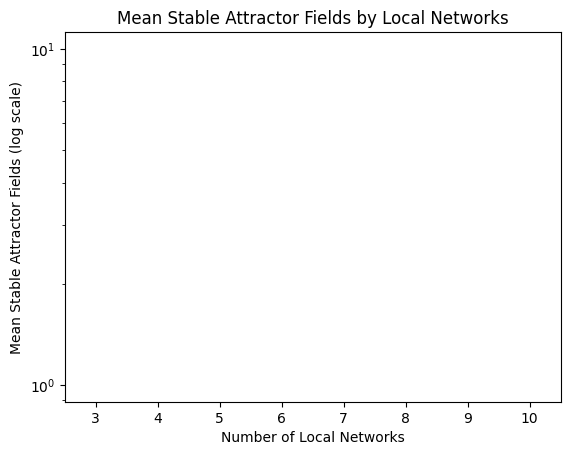

In [37]:
# Define function for bar plots
def plot_bar_chart(attribute, title, ylabel, log_scale=False):
    grouped_data = df.groupby('n_local_networks')[attribute].mean()
    num_groups = len(grouped_data)
    cmap = matplotlib.colormaps['viridis']
    colors = cmap(np.linspace(0, 1, num_groups))

    grouped_data.plot(kind='bar', logy=log_scale, color=colors)
    plt.title(title)
    plt.xlabel('Number of Local Networks')
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.show()

# Generate bar plots
plot_bar_chart('n_local_attractors', 'Mean Local Attractors by Number of Local Networks', 'Mean Local Attractors')
plot_bar_chart('n_pair_attractors', 'Mean Attractor Pairs by Number of Local Networks', 'Mean Attractor Pairs')
plot_bar_chart('n_attractor_fields', 'Mean Stable Attractor Fields by Local Networks', 'Mean Stable Attractor Fields (log scale)', log_scale=True)

### Bloxplots and Violin Diagrams

/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjec

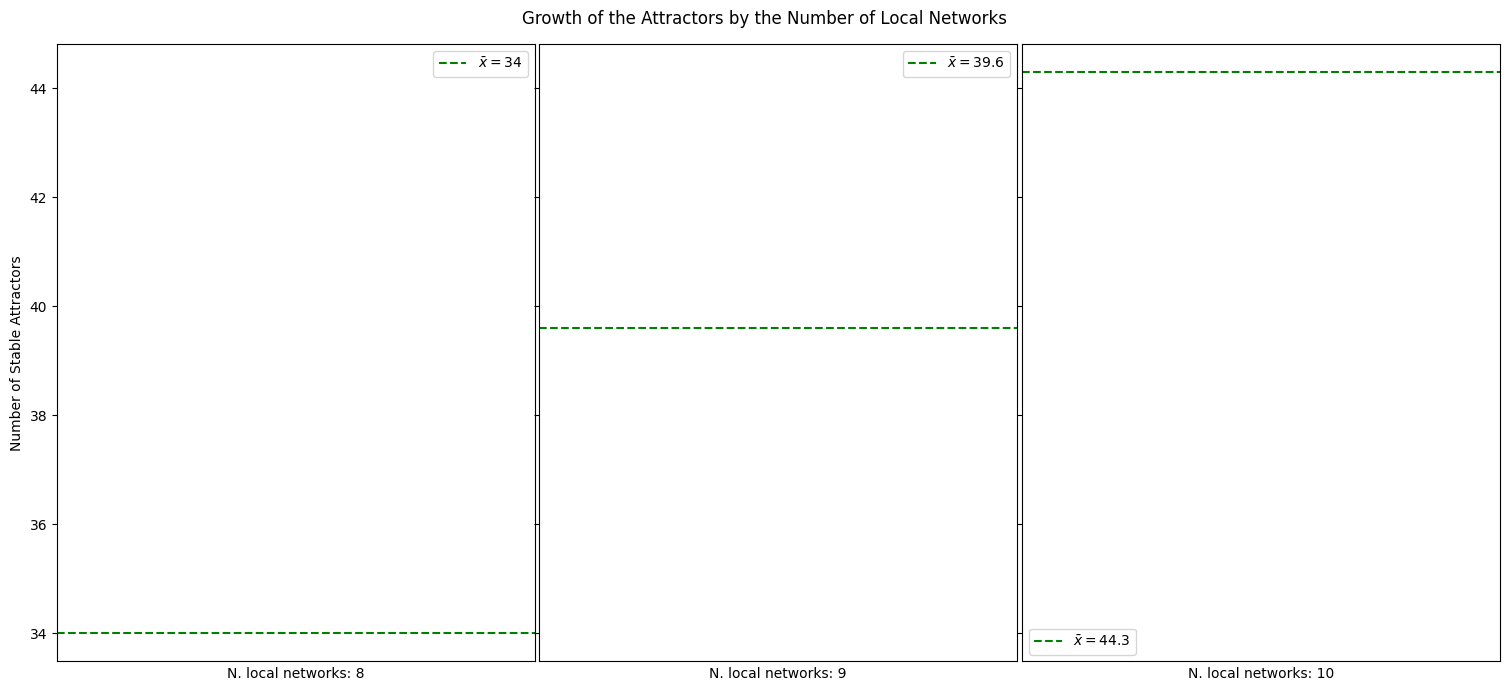

/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjec

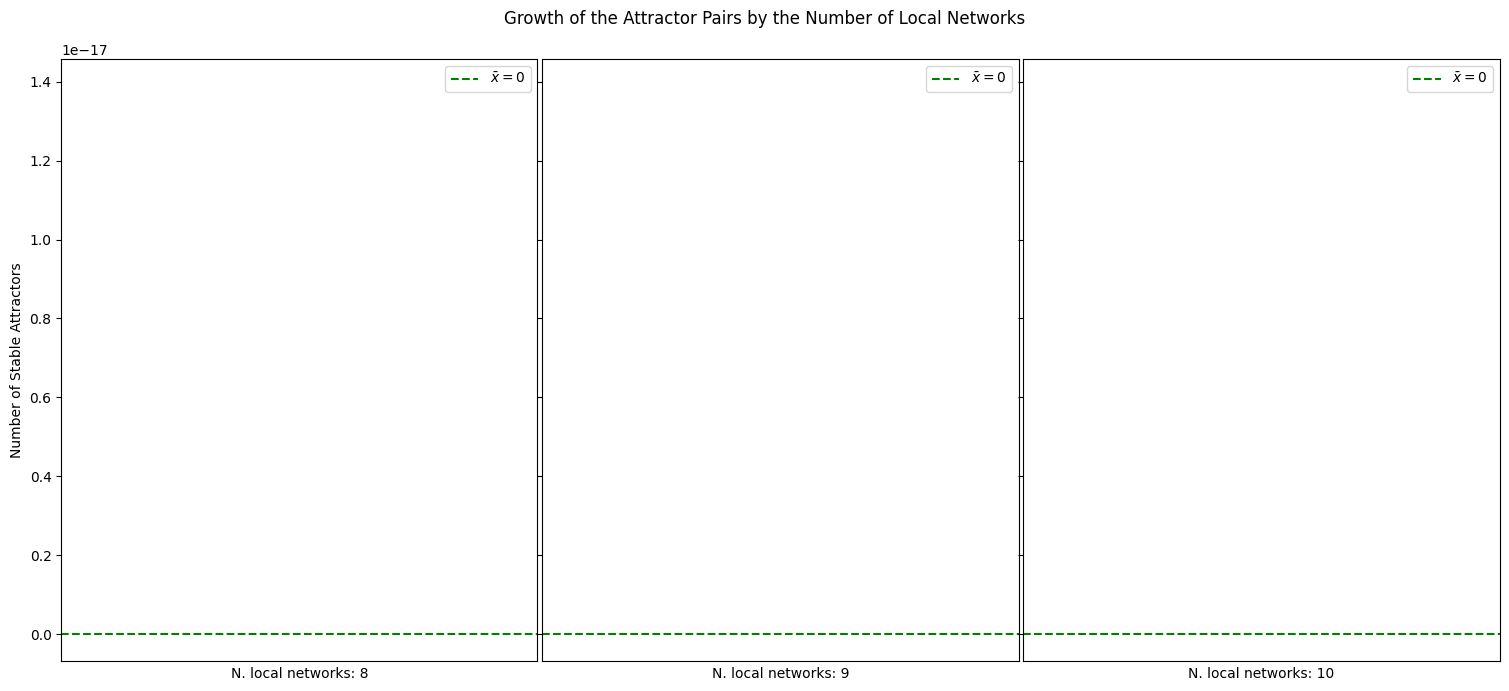

/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/carlos/PycharmProjec

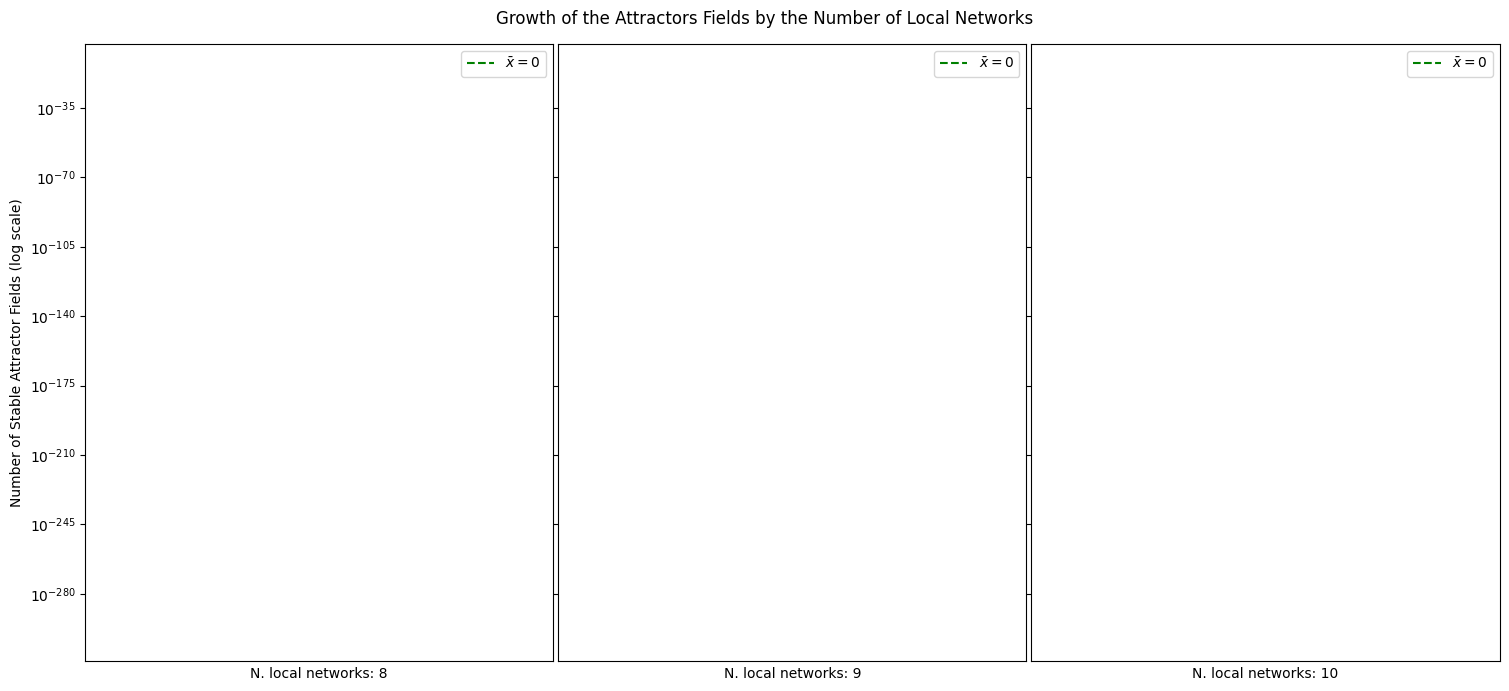

In [38]:
# Get the unique values of 'n_local_networks'
n_local_networks_unique = df_resume['n_local_networks'].unique()
n_local_networks_last_three = sorted(n_local_networks_unique)[-3:]

# Define attributes and titles for violin plots
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']
titles = [
    'Growth of the Attractors by the Number of Local Networks',
    'Growth of the Attractor Pairs by the Number of Local Networks',
    'Growth of the Attractors Fields by the Number of Local Networks'
]

# Generate violin plots
for attribute, title in zip(attributes, titles):
    fig, axs = plt.subplots(1, len(n_local_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_networks in enumerate(n_local_networks_last_three):
        data = df_resume[df_resume['n_local_networks'] == n_networks][attribute]
        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. local networks: {n_networks}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':
            axs[i].set_yscale('log')

    fig.suptitle(title)
    fig.tight_layout(w_pad=0)
    axs[0].set_ylabel('Number of Stable Attractor Fields (log scale)' if attribute == 'n_attractor_fields' else 'Number of Stable Attractors')
    plt.show()

### Incremental Taxs

In [39]:
# Sort the DataFrame by 'i_sample' and 'n_local_networks'
df_sorted = df.sort_values(['i_sample', 'n_local_networks'])

# Calculate the difference in 'n_attractor_fields' for each pair of consecutive values of 'n_local_networks' for a same 'i_sample'
df_sorted['diff_n_attractor_fields'] = df_sorted.groupby(['i_sample'])['n_attractor_fields'].diff()

# Remove rows containing NaN (corresponding to the first value of 'n_local_networks' for each 'i_sample')
df_sorted = df_sorted.dropna(subset=['diff_n_attractor_fields'])

# Calculate the average of the differences per 'i_sample'
average_diff_by_i_sample = df_sorted.groupby('i_sample')['diff_n_attractor_fields'].mean()

# Display the summary statistics of the average differences per 'i_sample'
average_diff_by_i_sample.describe()

count    10.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: diff_n_attractor_fields, dtype: float64

/tmp/ipykernel_606916/1267650596.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


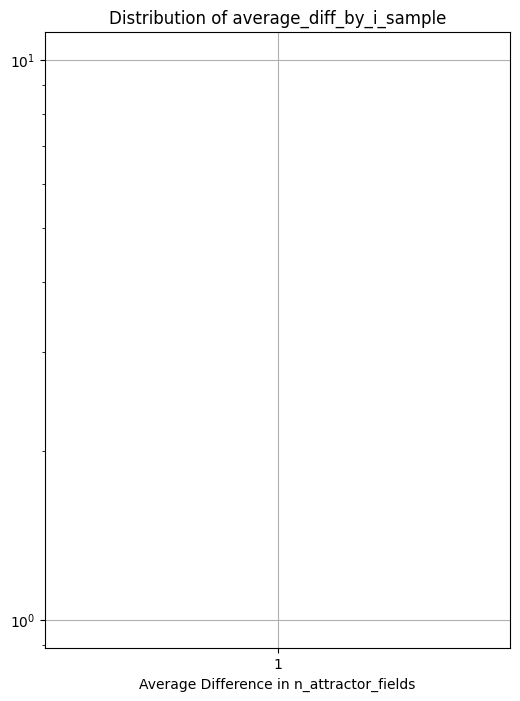

In [40]:
# Violin graph and boxplot for 'average_diff_by_i_sample'
plt.figure(figsize=(6, 8))

# Violin plot
plt.violinplot(average_diff_by_i_sample.values, vert=True, widths=0.9)

# Boxplot
plt.boxplot(average_diff_by_i_sample.values, vert=True, widths=0.4, patch_artist=True, showmeans=True)

# Log scale for y-axis
plt.yscale('log')

# Customize plot
plt.title('Distribution of average_diff_by_i_sample')
plt.xlabel('Average Difference in n_attractor_fields')
plt.ylabel('')
plt.grid(True)

# Show plot
plt.show()

### Top 20

/tmp/ipykernel_606916/2950746499.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')  # Apply log scale on the y-axis


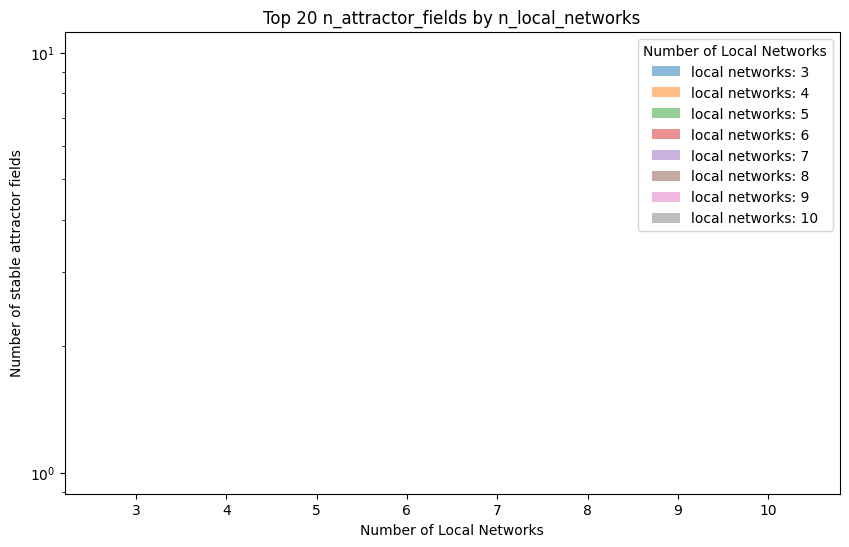

In [41]:
# Group by 'n_local_networks' and find the top 20 values of 'n_attractor_fields' for each group
top_20_by_n_local_network = df.groupby('n_local_networks')['n_attractor_fields'].nlargest(20)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Iterate over each group and draw the bars only for the top 20 values
for network, values in top_20_by_n_local_network.groupby(level=0):
    plt.bar([f'{network}'] * len(values), values.values, label=f'local networks: {network}', alpha=0.5)

# Customize the plot
plt.title('Top 20 n_attractor_fields by n_local_networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Number of stable attractor fields')
plt.yscale('log')  # Apply log scale on the y-axis
plt.legend(title='Number of Local Networks')

# Show the plot
plt.show()

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'df' es tu DataFrame

# Define the target network and other networks
target_network = 9  # Network for which to get top 20 n_attractor_fields
other_networks = [8,7,6,5, 4, 3]  # Networks for which to compare sample values

# Get top 20 n_attractor_fields for the target network
target_df = df[df['n_local_networks'] == target_network]
top_20_by_n_attractor_fields = target_df.nlargest(20, 'n_attractor_fields')

# Sort the top 20 by 'n_attractor_fields' to ensure the order is from max to min
top_20_by_n_attractor_fields = top_20_by_n_attractor_fields.sort_values(by='n_attractor_fields', ascending=False)
top_20_samples = top_20_by_n_attractor_fields['i_sample'].tolist()

# Extract sample values for other networks
other_network_samples = {}
for network in other_networks:
    # Filter data for the current network
    other_network_df = df[df['n_local_networks'] == network]

    # Filter to include only samples present in the reference
    filtered_network_df = other_network_df[other_network_df['i_sample'].isin(top_20_samples)]

    # Sort the filtered network data by 'i_sample' according to the top_20_samples order
    filtered_network_df['i_sample'] = pd.Categorical(filtered_network_df['i_sample'], categories=top_20_samples, ordered=True)
    filtered_network_df = filtered_network_df.sort_values(by='i_sample')

    # Extract and store sample values
    other_network_samples[network] = filtered_network_df

# Generate the comparison chart
plt.figure(figsize=(12, 8))

# Plot scatter points for the target network
plt.plot(range(1, 21), top_20_by_n_attractor_fields['n_attractor_fields'], color='red', linestyle='-', alpha=0.7, label=f'Network: {target_network}')
plt.scatter(range(1, 21), top_20_by_n_attractor_fields['n_attractor_fields'], color='red', marker='o', alpha=0.7)

# Plot lines and scatter points for other networks
for network, filtered_network_df in other_network_samples.items():
    # Get the order of samples for the current network
    network_order = [top_20_samples.index(sample) + 1 for sample in filtered_network_df['i_sample']]

    # Plot line
    plt.plot(network_order, filtered_network_df['n_attractor_fields'], color=f'C{network}', linestyle='-', alpha=0.7, label=f'Network: {network}')

    # Plot scatter points
    plt.scatter(network_order, filtered_network_df['n_attractor_fields'], color=f'C{network}', marker='o', alpha=0.7)

# Apply log scale to y-axis
plt.yscale('log')

# Customize the plot
plt.title('Comparison of Number of Attractor Fields for Top 20 for Network 9 with his predecessors')
plt.xlabel('Decrement order  of Top 20')
plt.xticks(range(1, 21))  # Set x-axis ticks to be integers from 1 to 20
plt.ylabel('Number of Attractor Fields (Log Scale)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


ValueError: Categorical categories must be unique

### Dispersion Graph

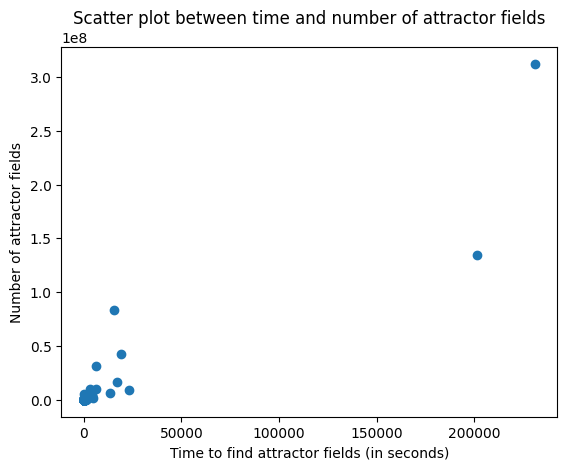

In [12]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

### Power-Law Distribution

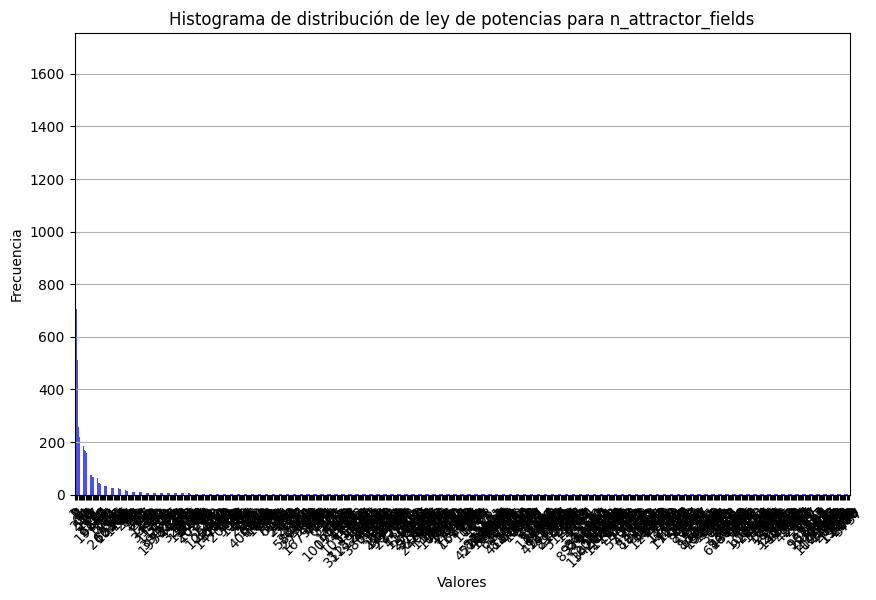

In [13]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Specific Statistics

### Local Networks = 9

In [14]:
# Filtrar el DataFrame por 'n_local_networks' igual a 11
df_filtered = df[df['n_local_networks'] == 9]

# Seleccionar las columnas requeridas
df_filtered_resume = df_filtered[['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]

# Describe the DataFrame to summarize statistics
df_filtered_resume = df_filtered_resume.describe()
df_filtered_resume

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,1000.000000,1000.000000,1.000000e+03
mean,38.913000,125.568000,6.525612e+05
std,18.194408,161.804599,1.114932e+07
min,18.000000,0.000000,0.000000e+00
25%,22.000000,32.000000,1.000000e+00
50%,35.000000,75.000000,4.450000e+01
75%,47.000000,154.500000,1.152000e+03
max,147.000000,1629.000000,3.121247e+08


In [15]:
# Cambiar los nombres de las columnas y ponerlos en negrita
df_filtered_resume.columns = ['\\textbf{Local Attractors}', '\\textbf{Attractor Pairs}', '\\textbf{Attractor Fields}']

# Formatear los valores a dos decimales
stats_formatted = df_filtered_resume.applymap(lambda x: f"{x:.2f}")

# Exportar las estadísticas descriptivas a una tabla LaTeX centrada
latex_text = stats_formatted.to_latex(
    index=True,          # Incluir el índice
    bold_rows=True,      # Hacer el índice en negrita
    column_format='lccc',  # Formato de las columnas (l: izquierda, c: centro, r: derecha)
    header=True,         # Incluir encabezados de columnas
    caption='',          # Leyenda en blanco
    label=''             # Etiqueta en blanco
)

# Escapar el carácter '%' en la cadena de LaTeX
latex_text_escaped = latex_text.replace('%', r'\%')

# Añadir el entorno para centrar la tabla
latex_text_centered = "\\begin{table}[ht]\n\\centering\n" + latex_text_escaped + "\\end{table}"

# Imprimir la tabla centrada
print(latex_text_centered)

\begin{table}[ht]
\centering
\begin{tabular}{lccc}
\toprule
 & \textbf{Local Attractors} & \textbf{Attractor Pairs} & \textbf{Attractor Fields} \\
\midrule
\textbf{count} & 1000.00 & 1000.00 & 1000.00 \\
\textbf{mean} & 38.91 & 125.57 & 652561.23 \\
\textbf{std} & 18.19 & 161.80 & 11149319.51 \\
\textbf{min} & 18.00 & 0.00 & 0.00 \\
\textbf{25\%} & 22.00 & 32.00 & 1.00 \\
\textbf{50\%} & 35.00 & 75.00 & 44.50 \\
\textbf{75\%} & 47.00 & 154.50 & 1152.00 \\
\textbf{max} & 147.00 & 1629.00 & 312124688.00 \\
\bottomrule
\end{tabular}
\end{table}
